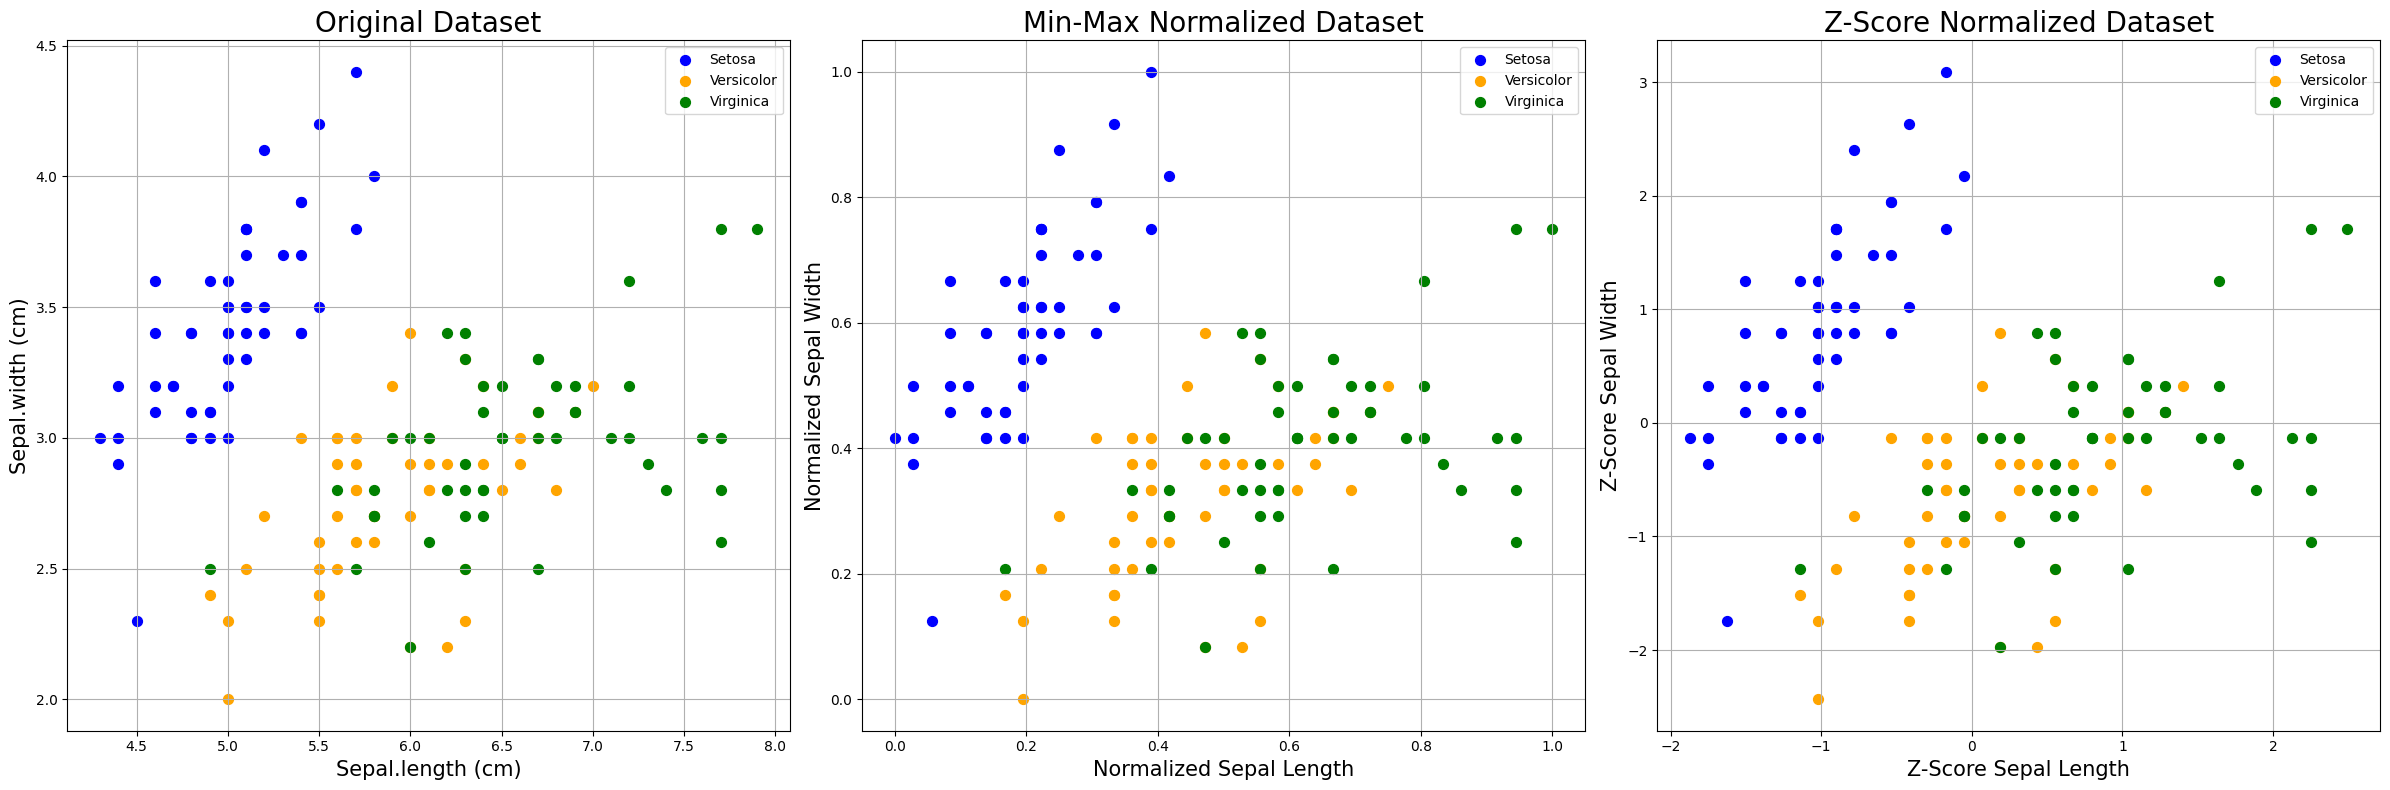

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


LENGTH = 'sepal.length'
WIDTH = 'sepal.width'
VARIETY = 'variety'

iris_dataset_path = "iris.csv"
df = pd.read_csv(iris_dataset_path)

final_df = df[[LENGTH, WIDTH, VARIETY]].copy()

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(final_df[[LENGTH, WIDTH]])
final_df_normalized = pd.DataFrame(normalized_data, columns=[LENGTH, WIDTH])
final_df_normalized[VARIETY] = final_df[VARIETY]

scaler = StandardScaler()
z_scaled = scaler.fit_transform(final_df[[LENGTH, WIDTH]])
final_df_z_scaled = pd.DataFrame(z_scaled, columns=[LENGTH, WIDTH])
final_df_z_scaled[VARIETY] = final_df[VARIETY]

targets = ['Setosa', 'Versicolor', 'Virginica']
colors = ['blue', 'orange', 'green']
features_to_plot = [LENGTH, WIDTH]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

ax1.set_xlabel(f'{LENGTH.capitalize()} (cm)', fontsize=15)
ax1.set_ylabel(f'{WIDTH.capitalize()} (cm)', fontsize=15)
ax1.set_title('Original Dataset', fontsize=20)
for target, color in zip(targets, colors):
    indicesToKeep = final_df[VARIETY] == target
    ax1.scatter(final_df.loc[indicesToKeep, LENGTH],
                final_df.loc[indicesToKeep, WIDTH],
                c=color, s=50, label=target)
ax1.legend()
ax1.grid()

ax2.set_xlabel('Normalized Sepal Length', fontsize=15)
ax2.set_ylabel('Normalized Sepal Width', fontsize=15)
ax2.set_title('Min-Max Normalized Dataset', fontsize=20)
for target, color in zip(targets, colors):
    indicesToKeep = final_df_normalized[VARIETY] == target
    ax2.scatter(final_df_normalized.loc[indicesToKeep, LENGTH],
                final_df_normalized.loc[indicesToKeep, WIDTH],
                c=color, s=50, label=target)
ax2.legend()
ax2.grid()

ax3.set_xlabel('Z-Score Sepal Length', fontsize=15)
ax3.set_ylabel('Z-Score Sepal Width', fontsize=15)
ax3.set_title('Z-Score Normalized Dataset', fontsize=20)
for target, color in zip(targets, colors):
    indicesToKeep = final_df_z_scaled[VARIETY] == target
    ax3.scatter(final_df_z_scaled.loc[indicesToKeep, LENGTH],
                final_df_z_scaled.loc[indicesToKeep, WIDTH],
                c=color, s=50, label=target)
ax3.legend()
ax3.grid()

plt.tight_layout()
plt.show()